Decision trees are powerful and popular technique in machine learning. The decision tree  helps to enable  us to automatically construct the decision tree that tell what outcomes we should predict in certain situations.

The decision tree algorithm is a supervised learning algorithm . we first construct the tree with historical data, and then use it to predict an outcome. We can use trees for classification or regression problems.

The data is looking at individual income in the United States. Data is from the 1994 census, and contains information on an individual's marital status, age, type of work, and more. The target column, or what we want to predict, is whether individuals make less than or equal to 50k a year, or more than 50k a year.

In [1]:
import pandas as pd
import numpy as np
import math
income = pd.read_csv("income.csv", index_col=False)
print(income.head(5))

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country high_income  
0          2174             0              40   United-States   

In [2]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
high_income       32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As we can see above the columns 'workclass', 'sex', 'race' are categorical variables  that have string values. we need to convert the categorical variables in our data set to numeric variables.

When we convert categorical data type, pandas will display the labels as strings, but internally store them as numbers so we can do computations with them, but these numbers aren't always compatible with other libraries like Scikit-learn,use the pandas.Categorical() class from pandas to perform the conversion to numbers.

In [3]:
cols = ['workclass','education', "marital_status", "occupation", "relationship", "race", "sex", "native_country", "high_income"]

for name in  cols:
    col = pd.Categorical(income[name])
    income[name]= col.codes
    
income.head()    

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


#### Splitting Data

A decision trees are made up of a series of nodes and branches. A nodew where we split the data and branch is one side of the split.

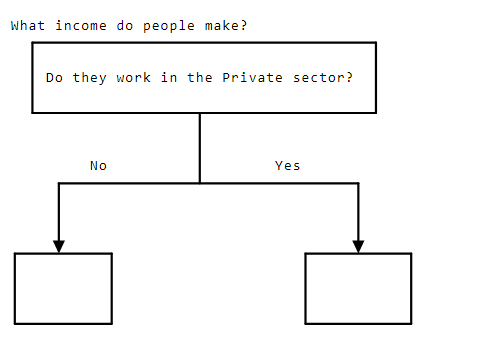


The tree above is two levels deep, because it has one split and twol level of nodes

In [4]:
private_incomes  = income[income['workclass']==4]

public_incomes = income[income['workclass']!=4]

print(private_incomes.shape)
print(public_incomes.shape)

(22696, 15)
(9865, 15)


#### Overview of Data Set Entropy

The nodes at the bottom of the tree, where we decide to stop splitting, are called terminal nodes, or leaves. We'll need to continue splitting nodes until we get to a point where all of the rows in a node have the same value. The metric used to measure the randomness in the data being proceesed is called Entropy.

Entropy is comes from information theory. A key concept in information theory is the notion of a bit of information. One bit of information is one unit of information. 

Entrophy refers to disorder. The more mixed together are called higer entrophy.Here in this dataset if it consisting entirely of 1s in the high_income column would have low entropy.


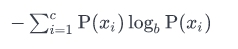



In this dataset we iterate through each unique value in a single column here it is in  high income column and asiign to i.

- b is the base of the logarithm we can set it to 2 but can also set ir 10 or any other value

we compute the probability value occuring in the data (p(xi)) and then we do some multiplication . Sum all of the values together.

In [5]:
## calculating entophy for high income column

prob_0 = income[income['high_income']==0].shape[0]/income.shape[0]


prob_1 = income[income['high_income']==1].shape[0]/income.shape[0]

income_entropy = -(prob_0*math.log(prob_0,2) + prob_1 * math.log(prob_1, 2))
income_entropy

0.7963839552022132

#### Information gain

The information gain which tell us which split will reduce the entrophy

if we need to split the data based on age  First, we calculate the median age, which is 50. Then, we assign any row with a value less than or equal to the median age the value 0 (in a new column named split_age), and the other rows 1.

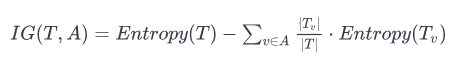

In [14]:
def cal_entropy(column):
    count = np.bincount(column)
    #print(count)
    probability = count/len(column)
    print(probability)
    
    entropy = 0
    for prob in probability:
        if prob > 0:
            entropy += prob * math.log(prob, 2)
    return -entropy

income_entropy = cal_entropy(income['high_income'])

median_age =  income['age'].median()

left_split = income[income['age']<=median_age]
right_split = income[income['age'] > median_age]

age_information_gain = income_entropy - ((left_split.shape[0] /  income.shape[0])*cal_entropy(left_split["high_income"]) + ((right_split.shape[0] / income.shape[0]) * cal_entropy(right_split["high_income"])))

age_information_gain

[0.75919044 0.24080956]
[0.86451652 0.13548348]
[0.64855164 0.35144836]


0.047028661304691965

we gain 0.047 bits of information by splitting our data set on the age variable.

### Finding the best splits

We'll find the variable to split on by calculating which split would have the highest information gain

In [15]:
def cal_information_gain(data, split_name, target_name):
    
    ### calculate the entrophy
    original_entropy =  cal_entropy(data[target_name])
    
    column = data[split_name]
    median = column.median()
    
    left_split = data[column <= median]
    right_split = data[column > median]
    
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * cal_entropy(subset[target_name])
    return original_entropy - to_subtract

#print(cal_information_gain(income, "age", "high_income"))

columns = ["age", "workclass", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "hours_per_week", "native_country"]

information_gains=[]

for col in columns:
    information_gain = cal_information_gain(income,col, 'high_income')
    
    information_gains.append(information_gain)
    
highest_gain_index = information_gains.index(max(information_gains))
highest_gain = columns[highest_gain_index]

highest_gain

[0.75919044 0.24080956]
[0.86451652 0.13548348]
[0.64855164 0.35144836]
[0.75919044 0.24080956]
[0.77739925 0.22260075]
[0.6580801 0.3419199]
[0.75919044 0.24080956]
[0.85003402 0.14996598]
[0.56875238 0.43124762]
[0.75919044 0.24080956]
[0.63146796 0.36853204]
[0.94847168 0.05152832]
[0.75919044 0.24080956]
[0.77706164 0.22293836]
[0.73667407 0.26332593]
[0.75919044 0.24080956]
[0.68490092 0.31509908]
[0.90355238 0.09644762]
[0.75919044 0.24080956]
[0.75919044 0.24080956]
[]
[0.75919044 0.24080956]
[0.75919044 0.24080956]
[]
[0.75919044 0.24080956]
[0.82658834 0.17341166]
[0.59753679 0.40246321]
[0.75919044 0.24080956]
[0.75891373 0.24108627]
[0.86746988 0.13253012]


'marital_status'

marital_status' is the highest information gain list.

speed_limit has highest Information gain